<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_7/Session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

Uploaded files to colab before execution (Uploaded in "framework" folder in github)

In [2]:
from model import AdvancedConvolutionNet
from datatransform import DataTransformation
from dataloader import Loader
from train import Train
from test import Test
import helper

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
transform = DataTransformation()
#Common transform for training and testing in this assignment
cifar10transform = transform.CIFAR10Transform()

loader = Loader(cifar10transform)
#Going with the default variable values set in the data loader
trainloader, testloader, classes = loader.CIFAR10Load()

Files already downloaded and verified
Files already downloaded and verified


horse   cat   cat  frog


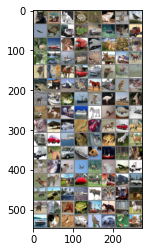

In [5]:
# Show random training images (default 4)
helper.DisplayImages(trainloader, classes)

  cat  ship  ship plane


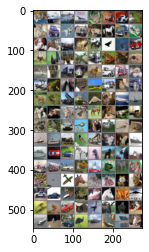

In [6]:
# Show random testing images (default 4)
helper.DisplayImages(testloader, classes)

In [7]:
model = AdvancedConvolutionNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [8]:
#Display model summary
helper.DisplayModelSummary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
            Conv2d-2           [-1, 26, 32, 32]             104
              ReLU-3           [-1, 26, 32, 32]               0
       BatchNorm2d-4           [-1, 26, 32, 32]              52
            Conv2d-5           [-1, 26, 32, 32]             234
            Conv2d-6           [-1, 52, 32, 32]           1,404
              ReLU-7           [-1, 52, 32, 32]               0
       BatchNorm2d-8           [-1, 52, 32, 32]             104
         MaxPool2d-9           [-1, 52, 16, 16]               0
           Conv2d-10           [-1, 52, 16, 16]             468
           Conv2d-11          [-1, 104, 16, 16]           5,512
             ReLU-12          [-1, 104, 16, 16]               0
      BatchNorm2d-13          [-1, 104, 16, 16]             208
           Conv2d-14          [-1, 104,

In [9]:
epochs = 50

In [10]:
#Training
Train(trainloader, model, criterion, optimizer, device, epochs).train()

[1,   391] loss: 480.908
[2,   391] loss: 304.022
[3,   391] loss: 231.356
[4,   391] loss: 179.373
[5,   391] loss: 132.781
[6,   391] loss: 91.035
[7,   391] loss: 55.584
[8,   391] loss: 30.014
[9,   391] loss: 12.214
[10,   391] loss: 4.855
[11,   391] loss: 2.598
[12,   391] loss: 1.793
[13,   391] loss: 1.412
[14,   391] loss: 1.166
[15,   391] loss: 1.002
[16,   391] loss: 0.876
[17,   391] loss: 0.793
[18,   391] loss: 0.708
[19,   391] loss: 0.669
[20,   391] loss: 0.607
[21,   391] loss: 0.563
[22,   391] loss: 0.524
[23,   391] loss: 0.492
[24,   391] loss: 0.459
[25,   391] loss: 0.437
[26,   391] loss: 0.426
[27,   391] loss: 0.411
[28,   391] loss: 0.375
[29,   391] loss: 0.366
[30,   391] loss: 0.339
[31,   391] loss: 0.334
[32,   391] loss: 0.304
[33,   391] loss: 0.300
[34,   391] loss: 0.289
[35,   391] loss: 0.279
[36,   391] loss: 0.268
[37,   391] loss: 0.258
[38,   391] loss: 0.247
[39,   391] loss: 0.241
[40,   391] loss: 0.232
[41,   391] loss: 0.233
[42,   391]

In [11]:
#Testing
Test(testloader, model, criterion, device).test()

Accuracy of the network on the 10000 test images: 80 %


In [12]:
helper.DisplayClassAccuracy(model, testloader, classes, device)

Accuracy of plane : 82 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 58 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 80 %
Accuracy of horse : 84 %
Accuracy of  ship : 93 %
Accuracy of truck : 87 %
